 pip install import-ipynb

In [23]:
# load in functions to use series summation to approach the integral
import os
from contextlib import contextmanager, redirect_stderr, redirect_stdout
@contextmanager
def suppress_stdout_stderr():
    """A context manager that redirects stdout and stderr to devnull"""
    with open(os.devnull, 'w') as fnull:
        with redirect_stderr(fnull) as err, redirect_stdout(fnull) as out:
            yield (err, out)

with suppress_stdout_stderr():
    import import_ipynb
    import CodingNote_analysis_supp as cnas
# define the definite integral function of inverse cosh(x)
import time


Details could be seen in file "CodingNote_analysis_supp.lyx"

Verification for convergence of series expansion of $\frac{1}{cosh^4(dx-c)}$ in domain $(\frac{c}{d}, \infty)$;

Demo test for non-linear fitting algrithm: $\rho(\bm{r})= \frac{1}{2}\tanh\frac{R-\left|\bm{r}-\bm{r}_{0}\right|}{\sqrt{\kappa}}$

Geometry size $L\times L\times L$, number of points along each axis $N$


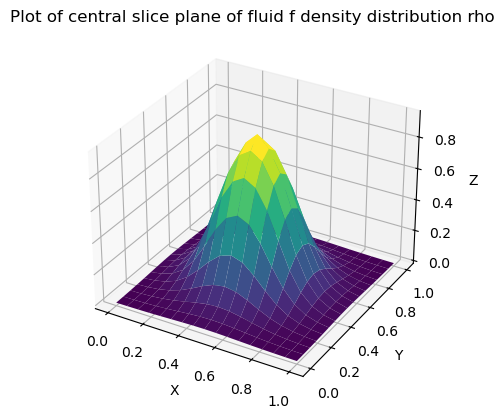

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import math
from scipy.integrate import quad

L = 1
N = 17
kappa = 0.02 # kappa = 2W in the fitting model
R = 0.2*L
dx = L/(N-1)
dy = dx
dz = dx
#rho_demo_analytical = np.zeros()

# Create data for the plot
x = np.linspace(0., L, N)
y = np.linspace(0., L, N)
z = np.linspace(0., L, N)
X, Y, Z = np.meshgrid(x, y, z)
rho_demo_analytical = 0.5*(1+np.tanh((R-np.sqrt((X-0.5)**2+(Y-0.5)**2+(Z-0.5)**2))/np.sqrt(kappa)))

# Plot the surface
# Create a figure and an axes object
fig = plt.figure()
ax = fig.add_subplot(1,1,1, projection='3d')
slicing_idx = N//2
#print(rho_demo_analytical[:,:,slicing_idx])
ax.plot_surface(X[:,:,slicing_idx], Y[:,:,slicing_idx], rho_demo_analytical[:,:,slicing_idx], cmap='viridis')

# Set labels and title
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.title('Plot of central slice plane of fluid f density distribution rho')

# Show the plot
plt.show()

Figure.add_subplot(*args, **kwargs), *args: (int, int, index), default: (1, 1, 1)

    Three integers (nrows, ncols, index). The subplot will take the index position on a grid with nrows rows and ncols columns. index starts at 1 in the upper left corner and increases to the right. index can also be a two-tuple specifying the (first, last) indices (1-based, and including last) of the subplot, e.g., fig.add_subplot(3, 1, (1, 2)) makes a subplot that spans the upper 2/3 of the figure.

    projection='3d': The default mode for matplotlib is to produce 2D plots. The option projection becomes available after import Axes3D from mpl_toolkits as the base _axes object will be added.

Define function $\tanh(a-x)\frac{x^n}{\cosh^2(a-x)}$ as [ func_tanhInvcosh2Xn ] and its definite integral
$$\int_0^\infty\tanh(a-x)\frac{x^n}{\cosh^2(a-x)}dx$$
as [ integral_func1 ]. Two parameters here: $a$, $n$.

In [3]:
# define the definite integral function
inv_acosh = lambda x: 1/np.cosh(x) if np.all(np.abs(x) < 710.4) else 0.

def func_tanhInvcosh2Xn(x, n, a):
    return np.tanh(a-x)*x**n*(inv_acosh(a-x)**2)

def integral_func1(n, a):
    int_val = quad(func_tanhInvcosh2Xn, 0, np.inf, args=(n,a))
    return int_val[0]

Define function $\frac{x^n}{\cosh^4(dx-c)}$ as [ func_Invcosh4Xn ] and its definite integral
$$\int_0^\infty\frac{x^n}{\cosh^4(dx-c)}dx$$
as [ integral_func2 ]. 3 parameters here: $n$, $d$, $c$.

In [4]:
def func_Invcosh4Xn(x, n, d, c):
    return x**n*(inv_acosh(d*x-c)**4)

def integral_func2(n, d, c):
    int_val = quad(func_Invcosh4Xn, 0, np.inf, args=(n,d,c))
    return int_val[0]

Define function $\frac{x^n}{\cosh^2(dx-c)}$ as [ func_Invcosh4Xn ] and its definite integral
$$\int_0^\infty\frac{x^n}{\cosh^2(dx-c)}dx$$
as [ integral_func3 ]. 3 parameters here: $n$, $d$, $c$.

In [5]:
def func_Invcosh2Xn(x, n, d, c):
    return x**n*(inv_acosh(d*x-c)**2)

def integral_func3(n, d, c):
    int_val = quad(func_Invcosh2Xn, 0, np.inf, args=(n,d,c))
    return int_val[0]

Define 3D integral of function $F\left(x,y,z\right)$ with data points $F\left(x_{i},y_{j},z_{k}\right)$
$$\begin{align} 
	I&=\iiint F\left(x,y,z\right)d\Omega=\int_{a}^{b}\int_{c}^{d}\left(\int_{r\left(x,y\right)}^{s\left(x,y\right)}F\left(x,y,z\right)dz\right)dxdy \\ 
	 &=\sum_{i=0}^{N_{x}-1}\sum_{j=0}^{N_{y}-1}\sum_{k=0}^{N_{x,y}-1}w_{ijk}F\left(x_{i},y_{j},z_{k}\right)\Delta x\Delta y\Delta z_{ij}
  \end{align}$$
In our case, we set even grid size and 
$$I=\sum_{i=0}^{N-1}\sum_{j=0}^{N-1}\sum_{k=0}^{N-1}w_{ijk}F\left(x_{i},y_{j},z_{k}\right)\Delta x\Delta y\Delta z=\sum_{i=0}^{N-1}\sum_{j=0}^{N-1}\sum_{k=0}^{N-1}w^\prime_{ijk}F\left(x_{i},y_{j},z_{k}\right)$$
First initialize the weight 3D tensor $w^\prime_{ijk}:=w_{ijk}\Delta x\Delta y\Delta z$: [ weightArray ]

In [25]:
weightArray = np.ones((N, N, N))
# corner points, total 8 points
weightArray[0,0,0] = 1/8
weightArray[N-1,0,0] = 1/8
weightArray[0,N-1,0] = 1/8
weightArray[N-1,N-1,0] = 1/8
weightArray[0,0,N-1] = 1/8
weightArray[N-1,0,N-1] = 1/8
weightArray[0,N-1,N-1] = 1/8
weightArray[N-1,N-1,N-1] = 1/8
# boundary edge points, total 12 edges
# 4 vertical edges
weightArray[0,0,1:N-2] = 1/4
weightArray[N-1,0,1:N-2] = 1/4
weightArray[0,N-1,1:N-2] = 1/4
weightArray[N-1,N-1,1:N-2] = 1/4
# 4 lowewr horizontal edges
weightArray[1:N-2,0,0] = 1/4
weightArray[1:N-2,N-1,0] = 1/4
weightArray[0,1:N-2,0] = 1/4
weightArray[N-1,1:N-2,0] = 1/4
# 4 upper horizontal edges
weightArray[1:N-2,0,N-1] = 1/4
weightArray[1:N-2,N-1,N-1] = 1/4
weightArray[0,1:N-2,N-1] = 1/4
weightArray[N-1,1:N-2,N-1] = 1/4
# interior points of the bounding surfaces, total 6 surfaces
# surfaces parallel with xy-plane 
for i in range(0, N):
    for j in range(0, N):
        if weightArray[i,j,0] == 1:
            weightArray[i,j,0] = 1/2
for i in range(0, N):
    for j in range(0, N):
        if weightArray[i,j,N-1] == 1:
            weightArray[i,j,N-1] = 1/2
# surfaces parallel with xz-plane 
for i in range(0, N):
    for k in range(0, N):
        if weightArray[i,0,k] == 1:
            weightArray[i,0,k] = 1/2
for i in range(0, N):
    for k in range(0, N):
        if weightArray[i,N-1,k] == 1:
            weightArray[i,N-1,k] = 1/2
# surfaces parallel with yz-plane 
for j in range(0, N):
    for k in range(0, N):
        if weightArray[0,j,k] == 1:
            weightArray[0,j,k] = 1/2
for j in range(0, N):
    for k in range(0, N):
        if weightArray[N-1,j,k] == 1:
            weightArray[N-1,j,k] = 1/2
weightArray = weightArray*dx*dy*dz

Implementation of func [ integral3D ] using 3D Trapezoidal Rule.

Input: 3D array of $W$ (weight tensor $w^\prime_{ijk}$ derived above) and function $F$

In [26]:
def integral3D(F, W):
    return np.sum(np.multiply(F,W))

Demo test for the function:
$$F=\iiint x^2y^2z^2dxdydz$$
The theoretical result is $\frac{1}{27}$.

In [ ]:
test_func = X; #(X**2)*(Y**2)*(Z**2)
#print(X)
FunctoInt = np.multiply(test_func, weightArray)
print("The numerical error is:")
print(weightArray[:,:,0])
print(integral3D(test_func, weightArray))

Center Of Mass:
$$\bm{r}_{0}=\frac{\int\rho_{f}\left(\bm{r}\right)\bm{r}d\bm{r}}{\int\rho_{f}\left(\bm{r}\right)d\bm{r}}\ \ \ \text{droplet:}\ \rho_{f}$$

In [27]:
def getCenterOfMass(func_rho_array):
    mass = integral3D(func_rho_array, weightArray)
    vec_com = np.zeros((3, 1))
    vec_com[0] = integral3D(func_rho_array*X, weightArray)/mass
    vec_com[1] = integral3D(func_rho_array*Y, weightArray)/mass
    vec_com[2] = integral3D(func_rho_array*Z, weightArray)/mass
    return vec_com

Test for density distribution demo [ rho_demo_analytical ] 

In [ ]:
# r0 denotes the center of mass position vector of size 3*1
r0 = getCenterOfMass(rho_demo_analytical)
print(r0)

Define some auxiliary variables. If the density varies from $0$ to $1$, then $C_0=1$ (i.e., $\rho\in[0,C_0]$). In the following test functions, by default we set $C_0=1$.
$$\begin{align}
J_{R_{n}}^{\left(R_{n}\right)}\left(W_{n},R_{n}\right)&:=\left(-\frac{C_0}{4}\eta_R\Delta t\right)4\sqrt{2}\pi\sqrt{W_{n}}\int_{0}^{\infty}\frac{1}{\cosh^{4}\left(\frac{R_{n}}{\sqrt{2W_{n}}}-x\right)}x^{2}dx \\ 
&=-C_0\eta_R\Delta t \sqrt{2}\pi\sqrt{W_{n}}\int_{0}^{\infty}\frac{1}{\cosh^{4}\left(\frac{R_{n}}{\sqrt{2W_{n}}}-x\right)}x^{2}dx
\end{align}$$
$$\begin{align}
J_{W_{n}}^{\left(R_{n}\right)}\left(W_{n},R_{n}\right)&:=-\left(-\frac{C_0}{4}\eta_R\Delta t\right)\frac{\pi}{W_{n}^{2}}\left[R_{n}\left(\sqrt{2W_{n}}\right)^{3}\int_{0}^{\infty}\frac{1}{\cosh^{4}\left(\frac{R_{n}}{\sqrt{2W_{n}}}-x\right)}x^{2}dx-4W_{n}^{2}\int_{0}^{\infty}\frac{1}{\cosh^{4}\left(\frac{R_{n}}{\sqrt{2W_{n}}}-x\right)}x^{3}dx\right] \\
&=\frac{C_0}{4}\eta_R\Delta t \frac{\pi}{W_{n}^{2}}\left[R_{n}\left(\sqrt{2W_{n}}\right)^{3}\int_{0}^{\infty}\frac{1}{\cosh^{4}\left(\frac{R_{n}}{\sqrt{2W_{n}}}-x\right)}x^{2}dx-4W_{n}^{2}\int_{0}^{\infty}\frac{1}{\cosh^{4}\left(\frac{R_{n}}{\sqrt{2W_{n}}}-x\right)}x^{3}dx\right]
\end{align}$$
$$\begin{align}
J_{R_{n}}^{\left(W_{n}\right)}\left(W_{n},R_{n}\right)&:=\frac{C_0}{4}\eta_W\Delta t\left[\frac{2\sqrt{2}\pi R_{n}}{\sqrt{W_{n}}}\int_{0}^{\infty}\frac{1}{\cosh^{4}\left(\frac{R_{n}}{\sqrt{2W_{n}}}-x\right)}x^{2}dx-4\pi\int_{0}^{\infty}\frac{1}{\cosh^{4}\left(\frac{R_{n}}{\sqrt{2W_{n}}}-x\right)}x^{3}dx\right]
\end{align}$$
$$J_{W_{n}}^{\left(W_{n}\right)}\left(W_{n},R_{n}\right):=-\frac{C_0}{4}\eta_W\Delta t\frac{\pi}{2W_{n}^{3}}\left[\begin{array}{c}
\left(\sqrt{2W_{n}}\right)^{3}R_{n}^{2}\int_{0}^{\infty}\frac{1}{\cosh^{4}\left(\frac{R_{n}}{\sqrt{2W_{n}}}-x\right)}x^{2}dx+\left(\sqrt{2W_{n}}\right)^{5}\int_{0}^{\infty}\frac{1}{\cosh^{4}\left(\frac{R_{n}}{\sqrt{2W_{n}}}-x\right)}x^{4}dx\\
-2R_{n}\left(\sqrt{2W_{n}}\right)^{4}\int_{0}^{\infty}\frac{1}{\cosh^{4}\left(\frac{R_{n}}{\sqrt{2W_{n}}}-x\right)}x^{3}dx
\end{array}\right]$$

$$M_{f}^{\left(W_{n}\right)}\left(W_{n},R_{n}\right):=\int\rho_{f}\left(\bm{r}\right)\frac{\frac{R_{n}-\left|\bm{r}-\bm{r}_{0}\right|}{2\sqrt{2}}\frac{1}{W_{n}^{\frac{3}{2}}}}{\cosh^{2}\frac{R_{n}-\left|\bm{r}-\bm{r}_{0}\right|}{\sqrt{2W_{n}}}}d\bm{r}=\frac{1}{2\sqrt{2}W_{n}^{\frac{3}{2}}}\int\rho_{f}\left(\bm{r}\right)\frac{R_{n}-\left|\bm{r}-\bm{r}_{0}\right|}{\cosh^{2}\frac{R_{n}-\left|\bm{r}-\bm{r}_{0}\right|}{\sqrt{2W_{n}}}}d\bm{r}$$
$$M_{f}^{\left(R_{n}\right)}\left(W_{n},R_{n}\right):=\int\rho_{f}\left(\bm{r}\right)\frac{\frac{1}{\sqrt{2W_{n}}}}{\cosh^{2}\frac{R_{n}-\left|\bm{r}-\bm{r}_{0}\right|}{\sqrt{2W_{n}}}}d\bm{r}=\frac{1}{\sqrt{2W_{n}}}\int\rho_{f}\left(\bm{r}\right)\frac{1}{\cosh^{2}\frac{R_{n}-\left|\bm{r}-\bm{r}_{0}\right|}{\sqrt{2W_{n}}}}d\bm{r}$$

In [28]:
def JRn_Rn(Wn, Rn, eta_R, dt):
    param_c = Rn/np.sqrt(2*Wn)
    param_d = 1
    JRn_Rn_val = -eta_R*dt*np.sqrt(2*Wn)*np.pi*integral_func2(2, param_d, param_c)
    return JRn_Rn_val

def JRn_Wn(Wn, Rn, eta_R, dt):
    param_c = Rn/np.sqrt(2*Wn)
    param_d = 1
    Wn2 = Wn**2
    factor = 1/4*eta_R*dt*np.pi/Wn2
    return factor*(Rn*2*Wn*np.sqrt(2*Wn)*integral_func2(2, param_d, param_c) - 4*Wn2*integral_func2(3, param_d, param_c))

def JWn_Rn(Wn, Rn, eta_W, dt):
    param_c = Rn/np.sqrt(2*Wn)
    param_d = 1
    factor = 1/4*eta_W*dt
    return factor*(2*np.sqrt(2)*np.pi*Rn/np.sqrt(Wn)*integral_func2(2, param_d, param_c) - 4*np.pi*integral_func2(3, param_d, param_c))

def JWn_Wn(Wn, Rn, eta_W, dt):
    param_c = Rn/np.sqrt(2*Wn)
    param_d = 1
    factor = -1/8*eta_W*dt*np.pi/(Wn**3)
    sqrt2Wn = np.sqrt(2*Wn) 
    val_term1 = sqrt2Wn**3*Rn**2*integral_func2(2, param_d, param_c)
    val_term2 = sqrt2Wn**5*integral_func2(4, param_d, param_c)
    val_term3 = 2*Rn*sqrt2Wn**4*integral_func2(3, param_d, param_c)
    return factor*(val_term1 + val_term2 - val_term3)

# the function passed in should be a 3D array type
def MfWn(func_rho_array, Wn, Rn, r0):
    R_prime_array = np.sqrt((X-r0[0])**2+(Y-r0[1])**2+(Z-r0[2])**2)
    dist_array = Rn - R_prime_array
    sqrt2Wn = np.sqrt(2*Wn)
    func_array = dist_array*inv_acosh((Rn - R_prime_array)/sqrt2Wn)*inv_acosh((Rn - R_prime_array)/sqrt2Wn)
    func_integral_array = func_rho_array*func_array
    return 1/(sqrt2Wn**3)*integral3D(func_integral_array, weightArray)

def MfRn(func_rho_array, Wn, Rn, r0):
    R_prime_array = np.sqrt((X-r0[0])**2+(Y-r0[1])**2+(Z-r0[2])**2)
    dist_array = Rn - R_prime_array
    sqrt2Wn = np.sqrt(2*Wn)
    func_array = inv_acosh(dist_array/sqrt2Wn)*inv_acosh(dist_array/sqrt2Wn)
    func_integral_array = func_rho_array*func_array
    return 1/sqrt2Wn*integral3D(func_integral_array, weightArray)

In [29]:
N = 20  # maximum Taylor expansion term stops at k = 20 (included)
n_max = 4
S_array = cnas.getCoefS(N)
combNomial = cnas.getCombNomial(n_max)
def JRn_Rn_usr(Wn, Rn, eta_R, dt):
    param_c = Rn/np.sqrt(2*Wn)
    param_d = 1
    JRn_Rn_val = -eta_R*dt*np.sqrt(2*Wn)*np.pi*cnas.integral_func2_series(2, param_d, param_c, combNomial, S_array, 1/param_d)
    return JRn_Rn_val

def JRn_Wn_usr(Wn, Rn, eta_R, dt):
    param_c = Rn/np.sqrt(2*Wn)
    param_d = 1
    Wn2 = Wn**2
    factor = 1/4*eta_R*dt*np.pi/Wn2
    return factor*(Rn*2*Wn*np.sqrt(2*Wn)*cnas.integral_func2_series(2, param_d, param_c, combNomial, S_array, 1/param_d) -\
                    4*Wn2*cnas.integral_func2_series(3, param_d, param_c, combNomial, S_array, 1/param_d))

def JWn_Rn_usr(Wn, Rn, eta_W, dt):
    param_c = Rn/np.sqrt(2*Wn)
    param_d = 1
    factor = 1/4*eta_W*dt
    return factor*(2*np.sqrt(2)*np.pi*Rn/np.sqrt(Wn)*cnas.integral_func2_series(2, param_d, param_c, combNomial, S_array, 1/param_d) -\
                    4*np.pi*cnas.integral_func2_series(3, param_d, param_c, combNomial, S_array, 1/param_d))

def JWn_Wn_usr(Wn, Rn, eta_W, dt):
    param_c = Rn/np.sqrt(2*Wn)
    param_d = 1
    factor = -1/8*eta_W*dt*np.pi/(Wn**3)
    sqrt2Wn = np.sqrt(2*Wn) 
    val_term1 = sqrt2Wn**3*Rn**2*cnas.integral_func2_series(2, param_d, param_c, combNomial, S_array, 1/param_d)
    val_term2 = sqrt2Wn**5*cnas.integral_func2_series(4, param_d, param_c, combNomial, S_array, 1/param_d)
    val_term3 = 2*Rn*sqrt2Wn**4*cnas.integral_func2_series(3, param_d, param_c, combNomial, S_array, 1/param_d)
    return factor*(val_term1 + val_term2 - val_term3)

# the function passed in should be a 3D array type
def MfWn(func_rho_array, Wn, Rn, r0):
    R_prime_array = np.sqrt((X-r0[0])**2+(Y-r0[1])**2+(Z-r0[2])**2)
    dist_array = Rn - R_prime_array
    sqrt2Wn = np.sqrt(2*Wn)
    func_array = dist_array*inv_acosh((Rn - R_prime_array)/sqrt2Wn)*inv_acosh((Rn - R_prime_array)/sqrt2Wn)
    func_integral_array = func_rho_array*func_array
    return 1/(sqrt2Wn**3)*integral3D(func_integral_array, weightArray)

def MfRn(func_rho_array, Wn, Rn, r0):
    R_prime_array = np.sqrt((X-r0[0])**2+(Y-r0[1])**2+(Z-r0[2])**2)
    dist_array = Rn - R_prime_array
    sqrt2Wn = np.sqrt(2*Wn)
    func_array = inv_acosh(dist_array/sqrt2Wn)*inv_acosh(dist_array/sqrt2Wn)
    func_integral_array = func_rho_array*func_array
    return 1/sqrt2Wn*integral3D(func_integral_array, weightArray)

$$\begin{align}
K^{\left(W_{n}\right)}\left(W_{n},R_{n}\right)=&\frac{\sqrt{2}\pi}{W_{n}^{\frac{3}{2}}}\left(\begin{array}{c}
R_{n}\left(\sqrt{2W_{n}}\right)^{3}\int\frac{1}{\cosh^{2}\left(\frac{R_{n}}{\sqrt{2W_{n}}}-x\right)}x^{2}dx-4W_{n}^{2}\int\frac{1}{\cosh^{2}\left(\frac{R_{n}}{\sqrt{2W_{n}}}-x\right)}x^{3}dx\\
R_{n}\left(\sqrt{2W_{n}}\right)^{3}\int\tanh\left(\frac{R_{n}}{\sqrt{2W_{n}}}-x\right)\frac{1}{\cosh^{2}\left(\frac{R_{n}}{\sqrt{2W_{n}}}-x\right)}x^{2}dx-4W_{n}^{2}\int\tanh\left(\frac{R_{n}}{\sqrt{2W_{n}}}-x\right)\frac{1}{\cosh^{2}\left(\frac{R_{n}}{\sqrt{2W_{n}}}-x\right)}x^{3}dx
\end{array}\right)
\end{align}$$
$$K^{\left(R_{n}\right)}\left(W_{n},R_{n}\right)=4\pi\cdot2W_{n}\left[\int\frac{1}{\cosh^{2}\left(\frac{R_{n}}{\sqrt{2W_{n}}}-x\right)}x^{2}dx+\int\tanh\left(\frac{R_{n}}{\sqrt{2W_{n}}}-x\right)\frac{1}{\cosh^{2}\left(\frac{R_{n}}{\sqrt{2W_{n}}}-x\right)}x^{2}dx\right]$$

In [30]:
def KWn(Wn, Rn):
    sqrtWn = np.sqrt(Wn)
    sqrt2Wn = np.sqrt(2*Wn)
    param_c = Rn/sqrt2Wn
    param_d = 1
    factor = np.sqrt(2)*np.pi/(sqrtWn**3)
    val_term1 = Rn*sqrt2Wn**3*integral_func3(2, param_d, param_c)
    val_term2 = 4*Wn**2*integral_func3(3, param_d, param_c)
    val_term3 = Rn*sqrt2Wn**3*integral_func1(2, param_c)
    val_term4 = 4*Wn**2*integral_func1(3, param_c)
    return factor*(val_term1 - val_term2 + val_term3 - val_term4)

def KRn(Wn, Rn):
    sqrt2Wn = np.sqrt(2*Wn)
    param_c = Rn/sqrt2Wn
    param_d = 1
    factor = 4*np.pi*2*Wn
    val_term1 = integral_func3(2, param_d, param_c)
    val_term2 = integral_func1(2, param_c)
    return factor*(val_term1 + val_term2)

In [31]:
def KWn_usr(Wn, Rn):
    sqrtWn = np.sqrt(Wn)
    sqrt2Wn = np.sqrt(2*Wn)
    param_c = Rn/sqrt2Wn
    param_d = 1
    factor = np.sqrt(2)*np.pi/(sqrtWn**3)
    val_term1 = Rn*sqrt2Wn**3*cnas.integral_func3_series(2, param_c)
    val_term2 = 4*Wn**2*cnas.integral_func3_series(3, param_c)
    val_term3 = Rn*sqrt2Wn**3*cnas.integral_func1_series(2, param_c)
    val_term4 = 4*Wn**2*cnas.integral_func1_series(3, param_c)
    return factor*(val_term1 - val_term2 + val_term3 - val_term4)

def KRn_usr(Wn, Rn):
    sqrt2Wn = np.sqrt(2*Wn)
    param_c = Rn/sqrt2Wn
    param_d = 1
    factor = 4*np.pi*2*Wn
    val_term1 = cnas.integral_func3_series(2, param_c)
    val_term2 = cnas.integral_func1_series(2, param_c)
    return factor*(val_term1 + val_term2)

$$\begin{align}
\left(\begin{array}{c}
\Delta W_{n}\\
\Delta R_{n}
\end{array}\right)&=\frac{\left(\begin{array}{cc}
1-J_{R_{n}}^{\left(R_{n}\right)}\left(W_{n},R_{n}\right) & J_{R_{n}}^{\left(W_{n}\right)}\left(W_{n},R_{n}\right)\\
J_{W_{n}}^{\left(R_{n}\right)}\left(W_{n},R_{n}\right) & 1-J_{W_{n}}^{\left(W_{n}\right)}\left(W_{n},R_{n}\right)
\end{array}\right)\cdot\left(\begin{array}{cc}
-\eta_{W}\Delta t & 0\\
0 & \eta_{R}\Delta t
\end{array}\right)\left(\begin{array}{c}
M_{f}^{\left(W_{n}\right)}\left(W_{n},R_{n}\right)-\frac{1}{2}K^{\left(W_{n}\right)}\left(W_{n},R_{n}\right)\\
M_{f}^{\left(R_{n}\right)}\left(W_{n},R_{n}\right)-\frac{1}{2}K^{\left(R_{n}\right)}\left(W_{n},R_{n}\right)
\end{array}\right)}{\left[1-J_{W_{n}}^{\left(W_{n}\right)}\left(W_{n},R_{n}\right)\right]\left[1-J_{R_{n}}^{\left(R_{n}\right)}\left(W_{n},R_{n}\right)\right]-J_{R_{n}}^{\left(W_{n}\right)}\left(W_{n},R_{n}\right)J_{W_{n}}^{\left(R_{n}\right)}\left(W_{n},R_{n}\right)}\\
&\sim\frac{\bm{A}\cdot\bm{B}\cdot\bm{C}}{D}\end{align}$$

In [32]:
def paramsVariations(func_rho_array, Wn, Rn, eta_W, eta_R, dt):
    matA = np.zeros((2,2))
    matB = np.zeros((2,2))
    vecC = np.zeros((2,1))
    coef_JRn_Rn = JRn_Rn_usr(Wn,Rn,eta_R,dt)
    coef_JWn_Rn = JWn_Rn_usr(Wn,Rn,eta_W,dt)
    coef_JRn_Wn = JRn_Wn_usr(Wn,Rn,eta_R,dt)
    coef_JWn_Wn = JWn_Wn_usr(Wn,Rn,eta_W,dt)
    # matrix A assembly
    matA[0,0] = 1 - coef_JRn_Rn
    matA[0,1] = coef_JWn_Rn
    matA[1,0] = coef_JRn_Wn
    matA[1,1] = 1 - coef_JWn_Wn
    # matrix B assembly
    matB[0,0] = -eta_W*dt
    matB[1,1] = eta_R*dt
    # vector C assembly
    vec_r0 = getCenterOfMass(func_rho_array)    # of size 3*1, center of mass position vector
    print("MfWn = %f" %(MfWn(func_rho_array,Wn,Rn,vec_r0)))
    vecC[0,0] = MfWn(func_rho_array,Wn,Rn,vec_r0) - 0.5*KWn_usr(Wn,Rn)
    vecC[1,0] = MfRn(func_rho_array,Wn,Rn,vec_r0) - 0.5*KRn_usr(Wn,Rn)
    # calculate determinant
    detD = (1-coef_JWn_Wn)*(1-coef_JRn_Rn) - coef_JWn_Rn*coef_JRn_Wn

    param_vars = 1/detD * matA @ matB @ vecC
    return param_vars
    

In [40]:
rho_test_analytical = 0.5*(1+np.tanh((R-np.sqrt((X-0.5)**2+(Y-0.5)**2+(Z-0.5)**2))/np.sqrt(kappa)))
print("R = %f"%(R))
print("kappa = %f"%(kappa))
ro = getCenterOfMass(rho_test_analytical)
print(r0)
print("MfWn = %f" %(MfWn(rho_test_analytical, 0.01, 0.3, r0)))
print("MfRn = %f" %(MfRn(rho_test_analytical, 0.01, 0.3, r0)))

R = 0.200000
kappa = 0.020000
[[0.50000019]
 [0.50000019]
 [0.50000019]]
MfWn = 0.392917


Demo test for different droplet size. See the training algrithm accuracy universality.



In [ ]:
bias_W = 0.1    # bias from the correct value
bias_R = 0.1
eta_R = 0.2     # learning rate for W,R
eta_W = eta_R
dt = 0.02       # time step for learning
Nstep = 2500    # total maximum training steps

radius_min = 0.1    # ensemble of droplets with different sizes
radius_max = 0.4
radius_num = 7
kappa = 0.02 # kappa = 2W in the fitting model, fixed size of the HALF diffusive interfacial thickness
radius_array = np.linspace(radius_min, radius_max, radius_num)

# recording fitting parameters value at each step for each radius size; [number of ensembles * parameter number 2 (0: W; 1: R) * training steps]
params_array_trials = np.zeros((radius_num, 2, Nstep))

for n in range(0, radius_num):
    R = radius_array[n]
    print("traning for radius R = %f" % (R))
    W0 = kappa/2 + bias_W   #initial guess with given bias
    R0 = R + bias_R
    # analytical model to be fitted
    rho_test_analytical = 0.5*(1+np.tanh((R-np.sqrt((X-0.5)**2+(Y-0.5)**2+(Z-0.5)**2))/np.sqrt(kappa)))

    Wn = W0 #initial guess
    Rn = R0
    params_array_trials[n,0,0] = W0
    params_array_trials[n,1,0] = R0
    #print("W: %f  R: %f" % (kappa/2,R))
    for k in range(1, Nstep):
        params_var = paramsVariations(rho_test_analytical,Wn,Rn,eta_W,eta_R,dt)
        Wn = Wn + params_var[0,0] # only 1 column
        Rn = Rn + params_var[1,0]
        params_array_trials[n,0,k] = Wn + params_var[0,0]
        params_array_trials[n,1,k] = Rn + params_var[1,0]


In [ ]:
steps_array = np.linspace(0, Nstep-1, Nstep)
num_rows = 0
num_cols = 2
if radius_num%num_cols == 0:
    num_rows = radius_num//num_cols
else:
    num_rows = radius_num//num_cols + 1

fig = plt.figure(figsize=(18,27))    # the default parameters (in inches) for Matplotlib plots are 6.4 wide and 4.8 high
for n in range(0, radius_num):
    fig.add_subplot(num_rows, num_cols, n+1)
    plt.plot(steps_array, params_array_trials[n,0,:], label = "Wn", linestyle=":")
    plt.plot(steps_array, params_array_trials[n,1,:], label = "Rn", linestyle="dashdot")
    plt.plot(steps_array, kappa/2*np.ones((Nstep,1)), label = "W", linestyle="-")
    plt.plot(steps_array, radius_array[n]*np.ones((Nstep,1)), label = "R", linestyle="-")
    plt.title('Radius R = %f, relative error (W,R) = (%f, %f)' % (radius_array[n], np.abs(params_array_trials[n,0,-1]-kappa/2)/(kappa/2), \
                                                                  (np.abs(params_array_trials[n,1,-1])-radius_array[n])/radius_array[n]))
    plt.legend()
plt.show()